In [2]:
import io
import time
import sys
import numpy as np
import platform
from PIL import ImageFont, ImageDraw, Image
from matplotlib import pyplot as plt
 
import cv2
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials

In [3]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [4]:
def put_text(image, text, x, y, color=(0, 255, 0), font_size=22):
    if type(image) == np.ndarray:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_coverted)
 
    if platform.system() == 'Darwin':
        font = 'AppleGothic.ttf'
    elif platform.system() == 'Windows':
        font = 'malgun.ttf'
        
    image_font = ImageFont.truetype(font, font_size)
    font = ImageFont.load_default()
    draw = ImageDraw.Draw(image)
 
    draw.text((x, y), text, font=image_font, fill=color)
    
    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
 
    return opencv_image

In [5]:
SUBSCRIPTION_KEY = "d48cd6f2811c4605a71e222105fe7c7c"
ENDPOINT_URL = "https://asure-ocr-checkmate.cognitiveservices.azure.com/"
 
computervision_client = ComputerVisionClient(ENDPOINT_URL, CognitiveServicesCredentials(SUBSCRIPTION_KEY))

In [6]:
#path = 'img_1.png' 
path = 'ozma_1.jpeg'
imageData = open(path, "rb").read()
sbuf = io.BytesIO(imageData)

In [7]:
response = computervision_client.read_in_stream(sbuf, raw=True)
operationLocation = response.headers["Operation-Location"]
operationID = operationLocation.split("/")[-1]

3단 4인쩔 2수버퍼
×
소멸의 강림 저지
레이드 시작
11
NPC 안내
파티
전용 옵션
캐릭터명
직업명
입장재료
번개파잡상인
[미]置 아수라
2
본스파이크
[미]트 버서커
공격대 참가
0
D
10
XX
<class 'numpy.ndarray'>


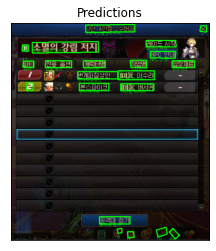

In [14]:
while True:
    read_result = computervision_client.get_read_result(operationID)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)
 
if read_result.status == OperationStatusCodes.succeeded:
    img = cv2.imread(path)
    roi_img = img.copy()
 
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            text = line.text
            box = list(map(int, line.bounding_box))
            (tlX, tlY, trX, trY, brX, brY, blX, blY) = box
            pts = ((tlX, tlY), (trX, trY), (brX, brY), (blX, blY))
 
            topLeft = pts[0]
            topRight = pts[1]
            bottomRight = pts[2]
            bottomLeft = pts[3]
 
            cv2.line(roi_img, topLeft, topRight, (0,255,0), 2)
            cv2.line(roi_img, topRight, bottomRight, (0,255,0), 2)
            cv2.line(roi_img, bottomRight, bottomLeft, (0,255,0), 2)
            cv2.line(roi_img, bottomLeft, topLeft, (0,255,0), 2)
            roi_img = put_text(roi_img, text, topLeft[0], topLeft[1] + 15, font_size=10)
 
            print(text)
            
    if len(roi_img.shape) < 3:
        rgbImg = cv2.cvtColor(roi_img, cv2.COLOR_GRAY2RGB)
    else:
        rgbImg = cv2.cvtColor(roi_img, cv2.COLOR_BGR2RGB)
        
    plt.imsave('test.png', rgbImg)
        
    print(type(rgbImg))

    plt.imshow(rgbImg)
    plt.title("Predictions")
    plt.xticks([]), plt.yticks([])
    plt.show()
    #plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))